In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving High.png to High (3).png
Saving Low.jpg to Low (3).jpg


In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import random

In [ ]:
def visualize(image):
    plt.figure(figsize=(12, 12))
    plt.imshow(image)

In [ ]:
image1 = cv2.cvtColor(cv2.imread("Low.jpg"), cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(cv2.imread("High.png"), cv2.COLOR_BGR2RGB)

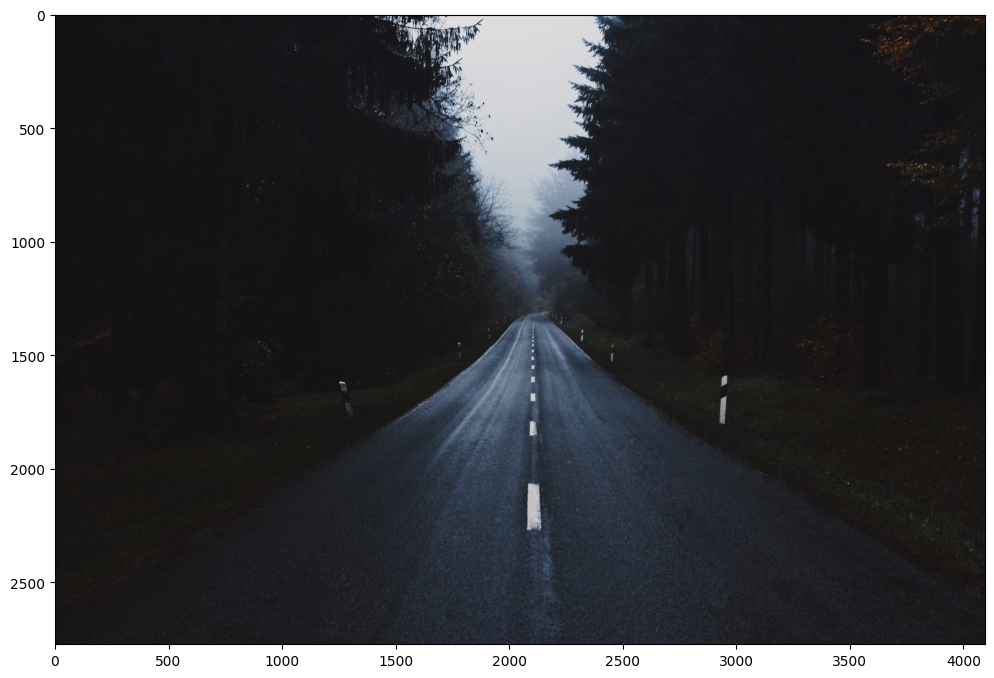

In [ ]:
visualize(image1)

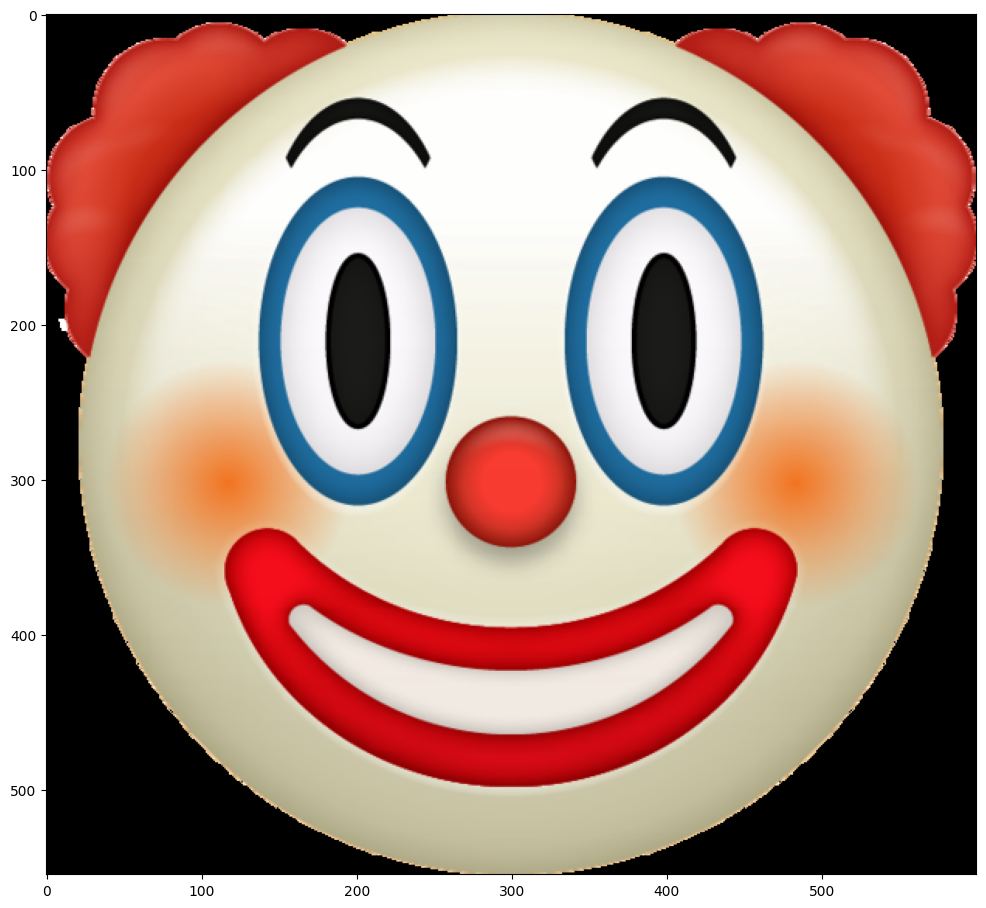

In [ ]:
visualize(image2)

In [ ]:
def destroy(image):
  rows, cols = image.shape[:2]
  M = np.float32([[1, 0, 500], [0, 1, 50]])
  img_shift = cv2.warpAffine(image, M, (cols, rows))
  flipped_img = cv2.flip(image, 0)
  return flipped_img

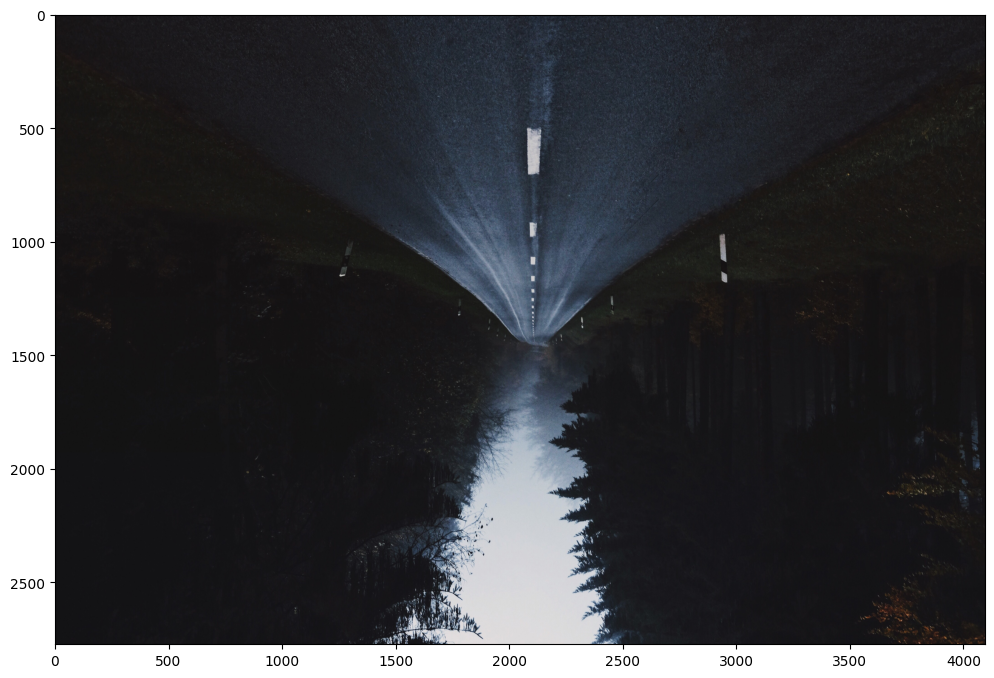

In [ ]:
im1 = destroy(image1)
visualize(im1)

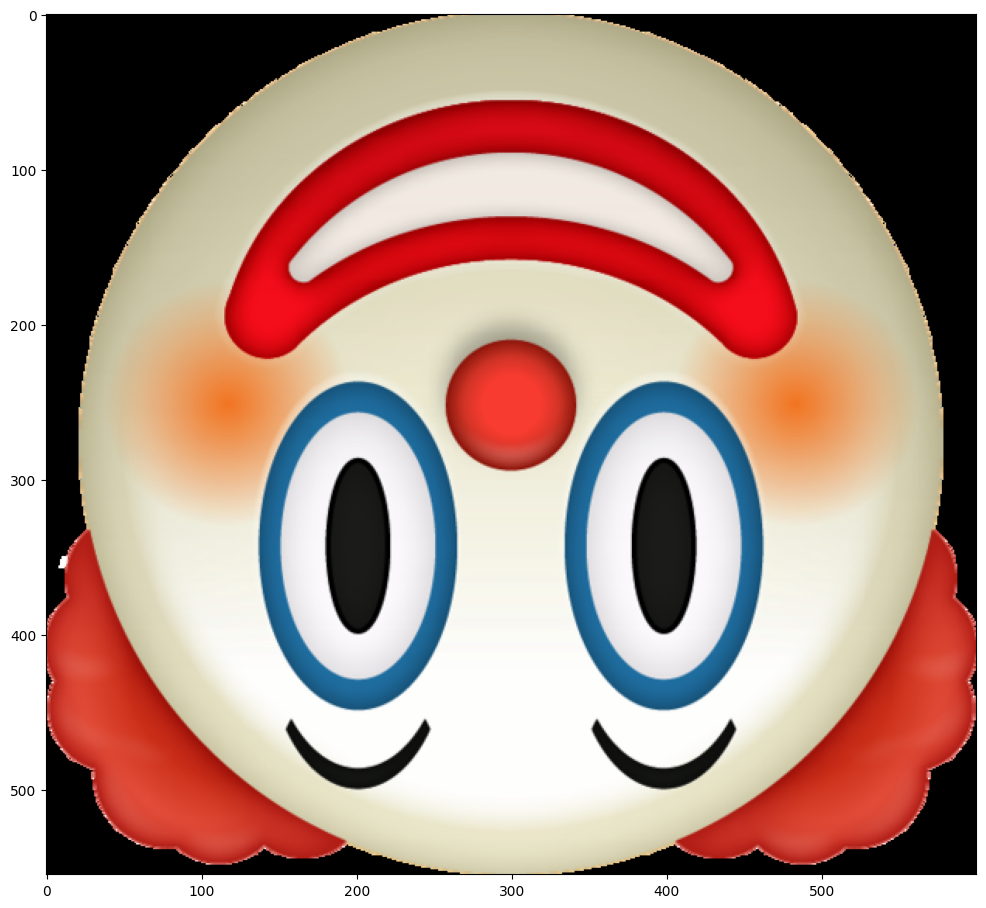

In [ ]:
im2 = destroy(image2)
visualize(im2)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def sift_match(image, im, t, matches_number):
  sift = cv2.xfeatures2d.SIFT_create()
  matcher = cv2.FlannBasedMatcher_create()
  kp1, des1 = sift.detectAndCompute(image, None)
  kp2, des2 = sift.detectAndCompute(im, None)

  matcher = cv2.FlannBasedMatcher_create()
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)

  return cv2.drawMatches(image, kp1, im, kp2, matches[:matches_number], None, flags=4)

In [ ]:
import math

In [ ]:
def euclidean_norm(x, y):
    norm = 0.0
    for xi, yi in zip(x, y):
        norm += (xi - yi)**2
    norm = math.sqrt(norm)
    return norm

In [ ]:
def sift_match_custom(image, im,t, matches_number):
  sift = cv2.xfeatures2d.SIFT_create()
  kp1, des1 = sift.detectAndCompute(image, None)
  kp2, des2 = sift.detectAndCompute(im, None)

  matches = []
  for i, d1 in enumerate(des1, start=0):
      for j, d2 in enumerate(des2, start=0):
          matches.append(cv2.DMatch(_trainIdx=j, _queryIdx=i, _distance=euclidean_norm(d1, d2), _imgIdx=0))

  matches = sorted(matches, key=lambda x: x.distance)

  return cv2.drawMatches(image, kp1, im, kp2, matches[:matches_number], None, flags=4)

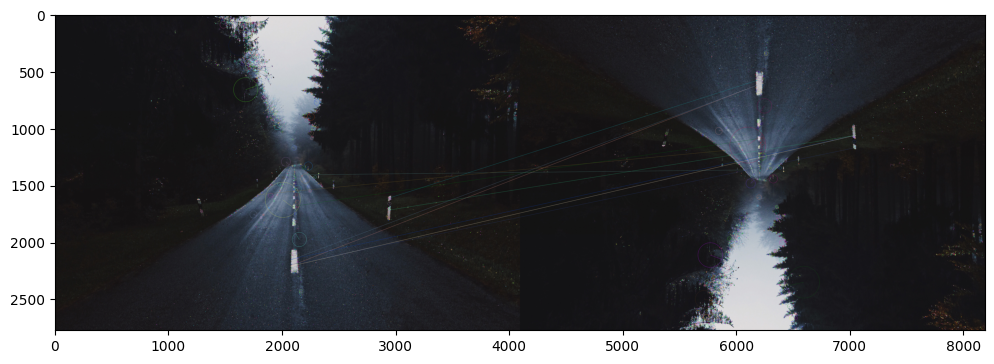

In [ ]:
visualize(image = sift_match(image1, im1, 1, matches_number=10))

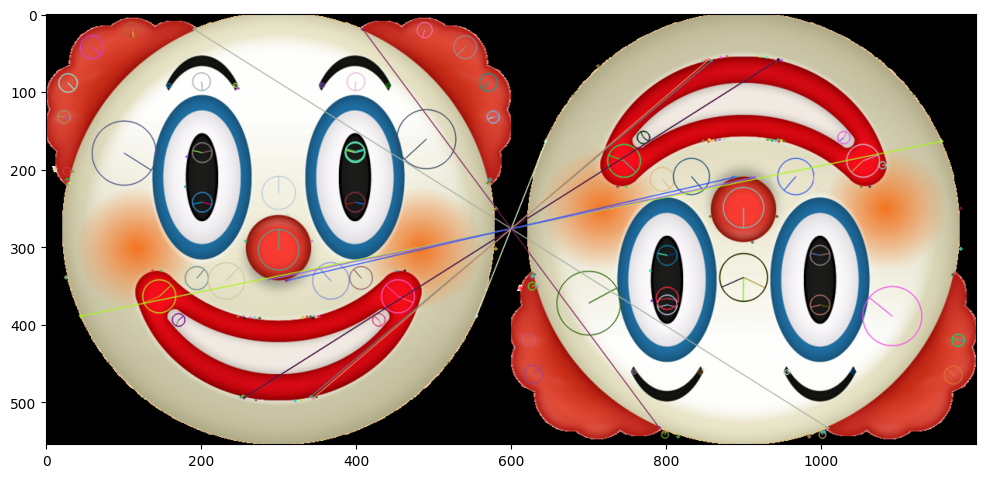

In [ ]:
visualize(image = sift_match(image2, im2, 0, matches_number=10))

In [ ]:
im1_rot = cv2.rotate(im1, cv2.ROTATE_90_CLOCKWISE)
im2_rot = cv2.rotate(im2, cv2.ROTATE_90_CLOCKWISE)

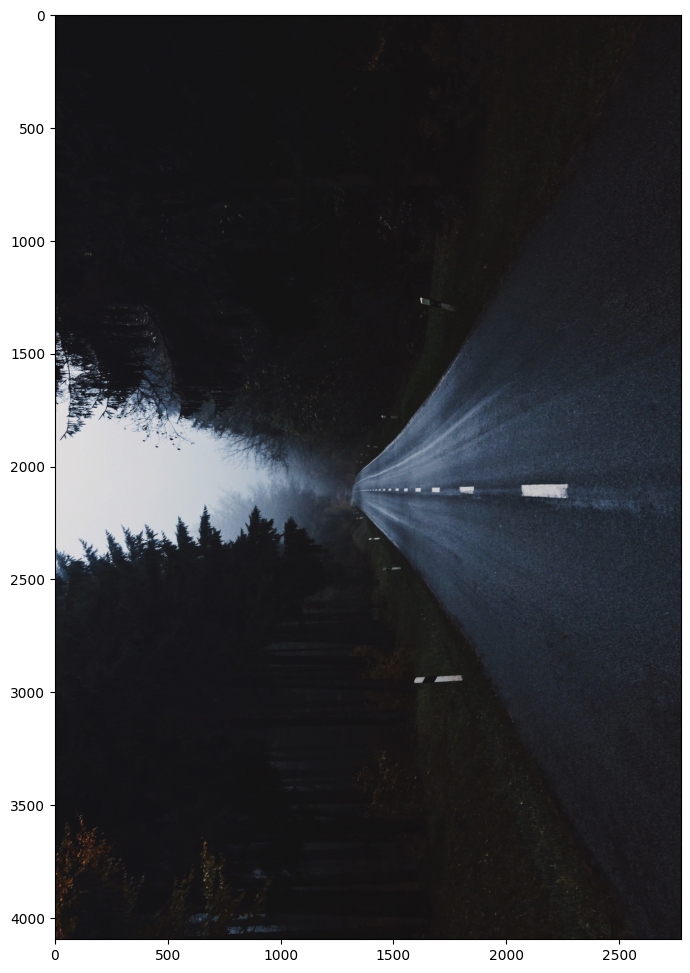

In [ ]:
visualize(im1_rot)

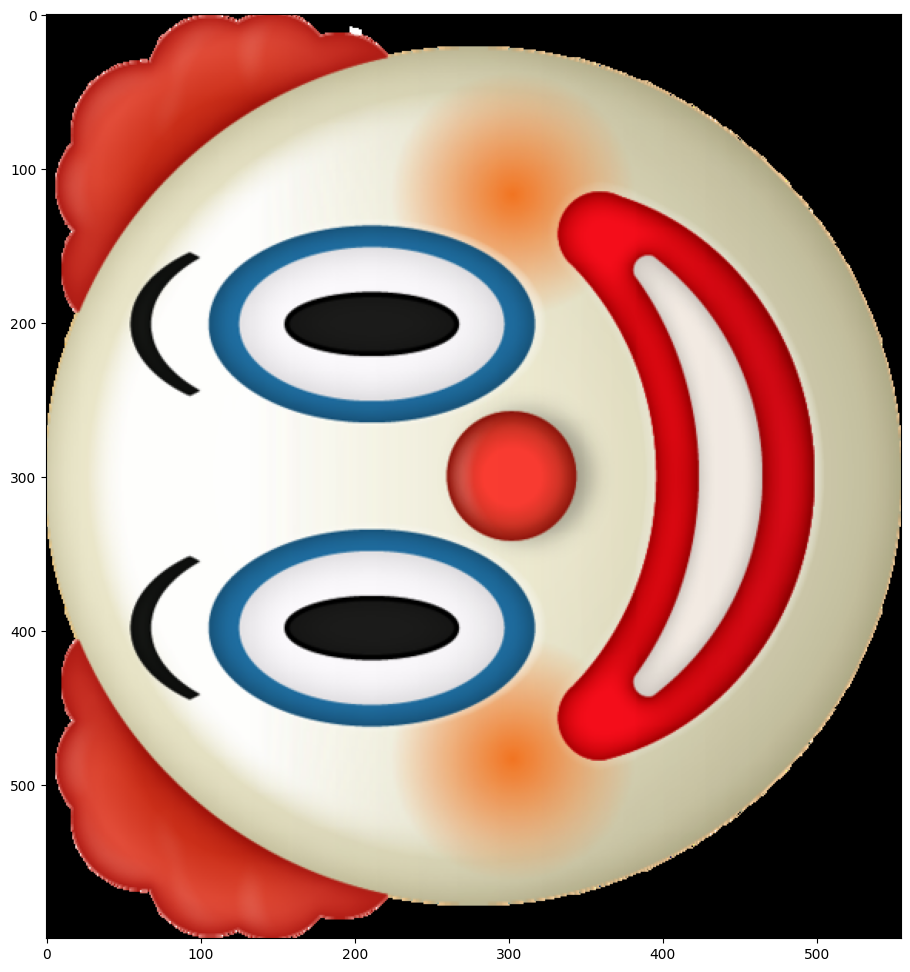

In [ ]:
visualize(im2_rot)

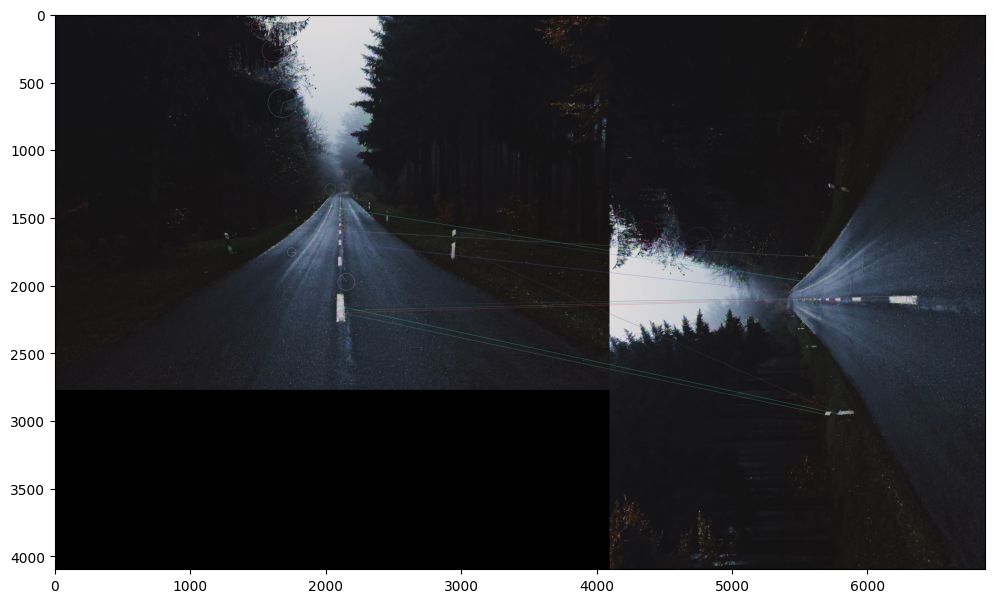

In [ ]:
visualize(image = sift_match(image1, im1_rot, 0, matches_number=10))

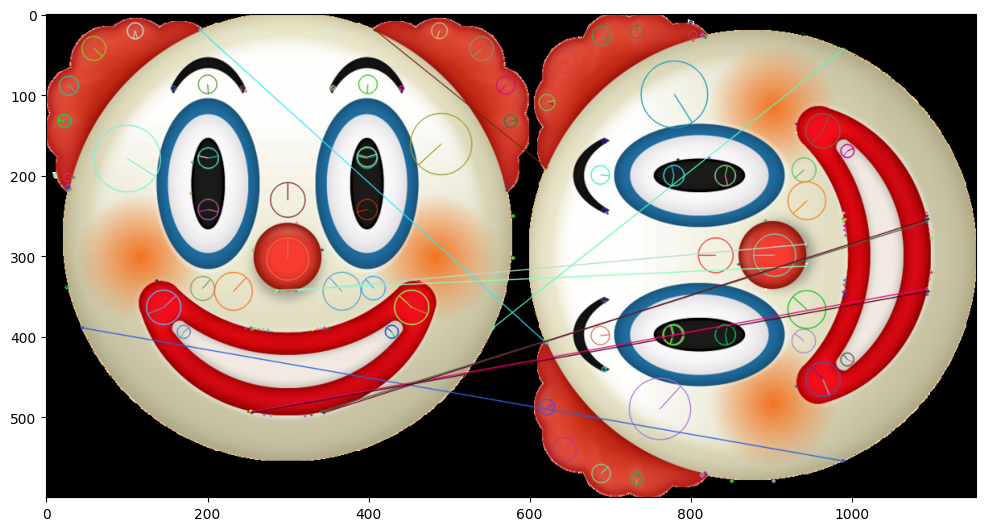

In [ ]:
visualize(image = sift_match(image2, im2_rot, 0, matches_number=10))